<div style="text-align: center;"><div  style="color:#7f0000; font-size:30px; font-weight:bold; line-height:40px;">Simple Linear Regression</div></div>
<div style="text-align: center; color:#006666"><strong>Owner: </strong>Mohit kumar</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>mohitujjain@gmail.com</div>
<div style="text-align: center; color:#006666"><strong>Linkedin ID: </strong>https://https://www.linkedin.com/in/mohit-kumar-61bb20198/</div>

# Business Problem

#### Apply the simple linear regression model for the data set Salary.
#### Decide whether there is a significant relationship between the variables in the linear regression model of the data set Salary at 5% significance level.

In [3]:
import numpy as np #Data Calculation
import pandas as pd #Data frame



import matplotlib.pyplot as plt  #Data visualization
import seaborn as sns ##Data visualization

from scipy import stats
import statsmodels.api as sm

from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
%matplotlib inline
import os 

# Data Import

In [5]:
# Industry way - Same step, sligthly different 

filepath = r"E:\Data Science\Irfaan Lec\Statistics\ProbabilityDist\Linear Regression"
filename = "Salary_Data.csv"

new = pd.read_csv(os.path.join(filepath, filename))

In [6]:
# Looking at the first five rows
new.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# Looking at the last five rows
new.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


# Data Type

In [8]:
# What type of values are stored in the columns?
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Univariate Analysis

In [9]:
# Let's Look at some statistical information about
# our dataframe
new.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Identify & Treatment of Outlier

<AxesSubplot:ylabel='YearsExperience'>

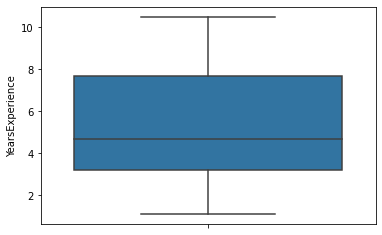

In [10]:
sns.boxplot(y='YearsExperience', data=new)

<AxesSubplot:ylabel='Salary'>

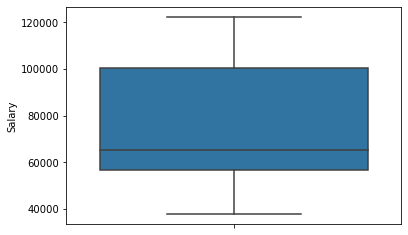

In [11]:
sns.boxplot(y='Salary', data=new)

# Missing Value

In [12]:
x=new[['YearsExperience']]
y=new[['Salary']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=131)

In [13]:
train = pd.concat([X_train,y_train], axis=1)

train.head()

,YearsExperience,Salary
17,5.3,83088.0
29,10.5,121872.0
16,5.1,66029.0
20,6.8,91738.0
4,2.2,39891.0


In [14]:
np.mean(train.Salary)

79101.95238095238

# Bi-variate Analysis

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

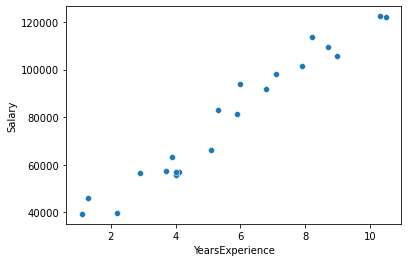

In [15]:
sns.scatterplot(x='YearsExperience', y='Salary',data=train)

In [16]:
train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.975115
Salary,0.975115,1.000000


<AxesSubplot:>

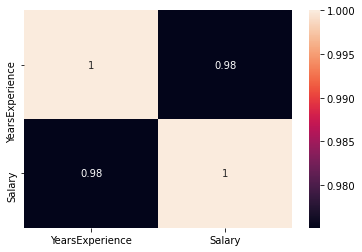

In [17]:
sns.heatmap(train.corr(),annot = True)

# Model Building


### Hypothesis Testing


   * HO :- There is no relationship between the Salary & YearsExperience
   
   * Vs
   
   * H1 :- There is  relationship between the Salary & YearsExperience
   
 ### Alpha  = 5%(0.05)

In [19]:
import statsmodels.formula.api as smf
reg = smf.ols('Salary ~ YearsExperience', data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           6.86e-14
Time:                        13:02:57   Log-Likelihood:                -212.17
No. Observations:                  21   AIC:                             428.3
Df Residuals:                      19   BIC:                             430.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.536e+04   3113.780      8.144      0.000    1.88e+04    3.19e+04
YearsExperience  9564.4382    498.878     19.172      0.000    8520.275    1.06e+04
==============================================================================
Omnibus:                        1.906   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.200
Skew:                           0.290   Prob(JB):                        0.549
Kurtosis:                       1.983   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

  * There is relationship between the Salary & YearsExperience
  
  
# Assumption of Model
   
   * Linearity
   * Homoscedasicity
   * Normality
   * Model Error

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

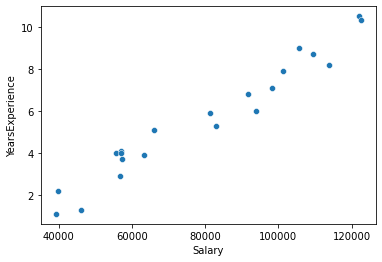

In [22]:
sns.scatterplot(x='Salary', y='YearsExperience',data=train)

In [23]:
train['fitted_value']=reg.fittedvalues
train['residual']=reg.resid

train.head()

,YearsExperience,Salary,fitted_value,residual
17,5.3,83088.0,76050.441138,7037.558862
29,10.5,121872.0,125785.519901,-3913.519901
16,5.1,66029.0,74137.553493,-8108.553493
20,6.8,91738.0,90397.098474,1340.901526
4,2.2,39891.0,46400.682645,-6509.682645


In [24]:
y=25.360+9.5641*5.3
y

76.04973

# Homoscedasicty

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

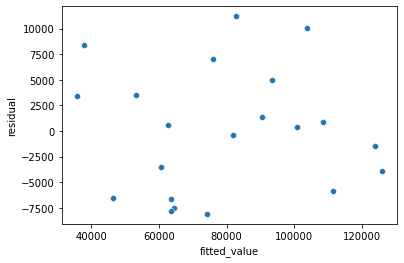

In [25]:
sns.scatterplot(x='fitted_value', y='residual', data=train)

# Normality

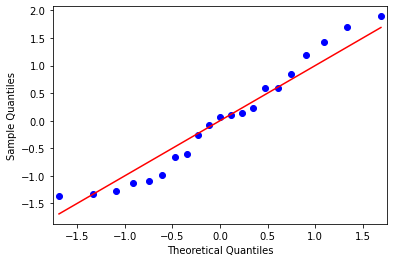

In [26]:
fig = sm.qqplot(train['residual'], fit=True, line='s')

# s indicate standardized line
plt.show()

# Model Error are ID

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


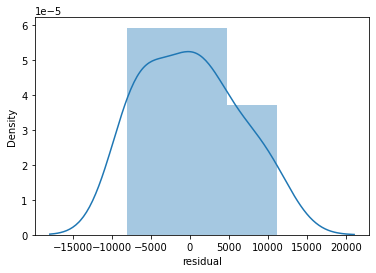

In [27]:
ax = sns.distplot(train.residual)

# Prediction on Test Data (unseen data)

In [28]:
test=pd.concat([X_test,y_test], axis=1)
test.head()

,YearsExperience,Salary
8,3.2,64445.0
15,4.9,67938.0
26,9.5,116969.0
3,2.0,43525.0
27,9.6,112635.0


In [29]:
y=25.360+9.5641*3.2
y

55.96512

In [30]:
test['Predicted']=reg.predict(test)
test.head() 

,YearsExperience,Salary,Predicted
8,3.2,64445.0,55965.120869
15,4.9,67938.0,72224.665849
26,9.5,116969.0,116221.081677
3,2.0,43525.0,44487.795000
27,9.6,112635.0,117177.525500


# Finish

# MSE & MAE & RMSE for evaluation of Model on train data

In [32]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(train['Salary'],train['fitted_value'])
# calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse))

RMSE 5.91e+03


# MSE & MAE & RMSE for evaluation of Model on test data

In [34]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['Salary'],test['Predicted'])
# calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse))

RMSE 4.82e+03
